In [1]:
list.of.packages <- c("rpart","rpart.plot")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(rpart)    
library(rpart.plot)    

Code sample illustrating building a model, creating predictions, and writing out a CSV suitable to submit to Kaggle

## Read in the training dataset:

In [2]:
wine.df <- read.csv('https://raw.githubusercontent.com/serivan/mldmlab/master/Datasets/Kaggle-Wine-train.csv', sep=",")
summary(wine.df)

       Id       fixed.acidity    volatile.acidity  citric.acid   
 Min.   :   2   Min.   : 4.200   Min.   :  0.08   Min.   :0.000  
 1st Qu.:1172   1st Qu.: 6.300   1st Qu.:  0.21   1st Qu.:0.270  
 Median :2362   Median : 6.800   Median :  0.27   Median :0.320  
 Mean   :2346   Mean   : 6.857   Mean   : 11.11   Mean   :0.335  
 3rd Qu.:3506   3rd Qu.: 7.300   3rd Qu.:  0.33   3rd Qu.:0.390  
 Max.   :4653   Max.   :14.200   Max.   :965.00   Max.   :1.000  
                NA's   :3        NA's   :4                       
 residual.sugar     chlorides      free.sulfur.dioxide total.sulfur.dioxide
 Min.   : 0.600   Min.   :  0.02   Min.   :  3.00      Min.   : 10         
 1st Qu.: 1.700   1st Qu.: 33.00   1st Qu.: 24.00      1st Qu.:108         
 Median : 5.400   Median : 42.00   Median : 34.00      Median :135         
 Mean   : 6.485   Mean   : 40.68   Mean   : 35.33      Mean   :139         
 3rd Qu.:10.000   3rd Qu.: 49.00   3rd Qu.: 46.00      3rd Qu.:168         
 Max.   :65.800 

## Set up factorial (categorical variables):

3.Set Quality variable to factor column.

In [3]:
wine.df$Quality <- as.factor(wine.df$Quality) 


## Build an rpart decision tree:

* Install the rpart.plot package if you have not installed it.
* Load the library rpart.
* Load the library rpart.plot.

## Ensure everyone gets the same model and train:

* Set a seed for reproducibility.
* Create the simple machine learning model with rpart.

In [4]:
set.seed(4786)     
simple.tree <- rpart(Quality ~ . - Id, data = wine.df)

Make pretty plot of tree.

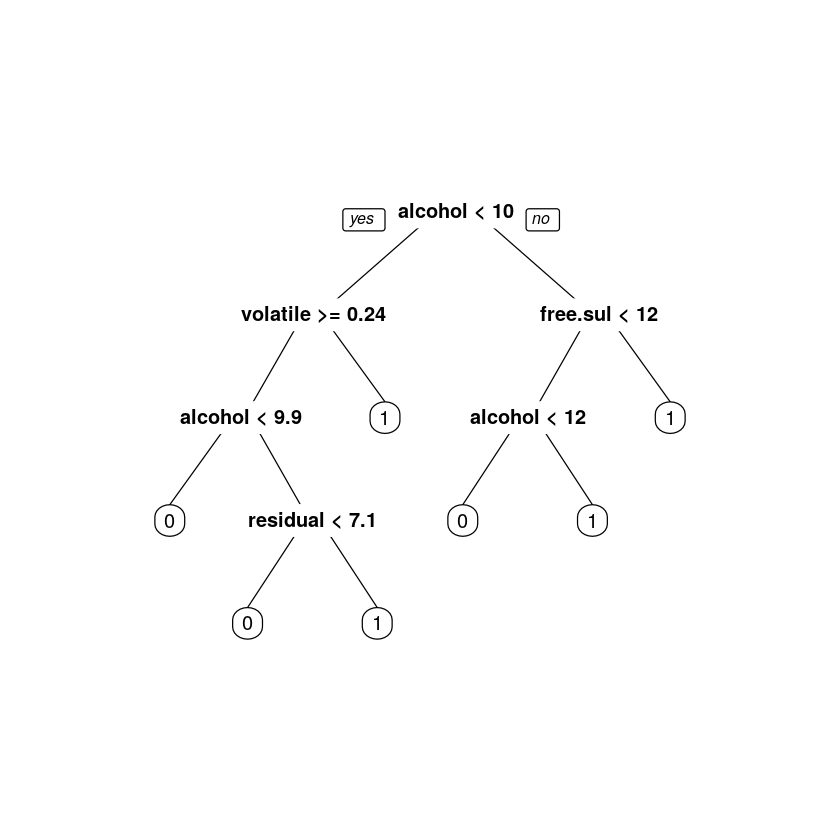

In [5]:
prp(simple.tree)

## Working with the test data:

* Read the test.csv file and setting stringsAsFactors as FALSE.
* Convert Quality variable into factor column.

In [6]:
wine.test <- read.csv("https://raw.githubusercontent.com/serivan/mldmlab/master/Datasets/Kaggle-Wine-test.csv", stringsAsFactors = FALSE) 
#wine.test$Quality <- as.factor(wine.test$Sex) 

## Create predictions:

* Create a prediction using predict function.

In [7]:
preds <- predict(simple.tree, wine.test, type = "class") 
preds

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   0    1    1    1    1    1    1    0    1    1    0    1    1    0    1    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    1    0    1    1    0    1    1    1    1    1    1    1    1    1    0 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   1    1    0    0    1    1    1    0    1    0    1    1    1    0    1    1 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   1    1    0    0    1    1    1    1    1    1    1    0    1    0    1    1 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   1    0    1    1    0    1    1    1    1    0    0    1    0    1    1    1 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   1    1    1    0    1    1    0    0    0    0    1    0    1    1    1    1 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   0    0    1    1    1    1    1    1    1    1    1    1    0    0    1    1 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
   0    1    0    0    0    1    1    1    1    0    1    0    0    1    1    1 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
   1    1    1    1    1    1    1    1    0    1    1    0    0    1    1    0 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
   1    1    1    0    1    1    1    1    0    1    1    1    1    1    1    1 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
   1    1    1    0    0    1    1    0    1    1    0    1    1    1    1    1 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
   1    1    0    1    0    1    1    0    1    0    0    0    0    1    1    1 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
   1    0    1    1    1    0    1    1    0    1    0    0    0    1    0    1 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
   1    0    1    1    0    1    1    1    0    1    0    1    0    0    1    0 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
   0    0    1    1    1    1    1    1    1    1    1    1    0    1    1    1 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
   0    1    0    1    0    1    1    1    1    1    1    1    0    1    0    0 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
   0    1    1    1    0    1    1    1    0    1    0    0    1    1    0    0 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
   1    1    1    0    1    1    0    0    1    1    0    1    1    0    0    1 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
   1    1    1    1    1    0    0    1    1    0    1    1    1    1    1    1 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
   1    1    0    1    1    1    1    0    1    1    1    0    1    0    1    0 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
   1    1    1    1    1    1    1    1    0    0    0    1    0    1    0    1 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
   0    1    1    1    1    1    1    1    0    0    1    1    1    0    1    0 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
   1    0    1    1    1    0    1    1    1    1    0    1    1    0    1    1 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
   1    0    1    1    1    1    1    0    1    1    1    1    1    1    1    1 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
   1    1    0    1    0    1    0

## Preparing for submission:

* Create dataframe for submission
* Write out a .CSV suitable for Kaggle submission

In [8]:
submission <- data.frame(Id = wine.test$Id,
                         Quality = preds)   
write.csv(submission, file = "MySubmission.csv", row.names = FALSE) 

In [9]:
list.files(path = ".")

[1] "Datasets"                                                     
 [2] "How_to_submit_prediction_to_Kaggle_in_Python.ipynb"           
 [3] "How_to_submit_prediction_to_Kaggle_in_Python.py"              
 [4] "How_to_submit_prediction_to_Kaggle_in_R_with_Keras.ipynb"     
 [5] "How_to_submit_prediction_to_Kaggle_in_R_with_Keras.R"         
 [6] "How_to_submit_prediction_to_Kaggle_in_R.ipynb"                
 [7] "How_to_submit_prediction_to_Kaggle_in_R.R"                    
 [8] "how-to-submit-prediction-to-kaggle-in-r.ipynb"                
 [9] "Install_R_notebook.ipynb"                                     
[10] "ISRL-Lab01.Rmd"                                               
[11] "ISRL-Lab02-LinearRegressioninPython.ipynb"                    
[12] "ISRL-Lab02-LinearRegressioninR.ipynb"                         
[13] "ISRL-Lab02.py"                                                
[14] "ISRL-Lab02.Rmd"                                               
[15] "ISRL-Lab03-K-NearestNeighborsinPython.ipynb"                  
[16] "ISRL-Lab03-K-NearestNeighborsinR.ipynb"                       
[17] "ISRL-Lab03.py"                                                
[18] "ISRL-Lab03.Rmd"                                               
[19] "ISRL-Lab04-LogisticRegressioninPython.ipynb"                  
[20] "ISRL-Lab04-LogisticRegressioninR.ipynb"                       
[21] "ISRL-Lab04.py"                                                
[22] "ISRL-Lab04.Rmd"                                               
[23] "ISRL-Lab05-LDAandQDAinPython.ipynb"                           
[24] "ISRL-Lab05-LDAandQDAinR.ipynb"                                
[25] "ISRL-Lab05.py"                                                
[26] "ISRL-Lab05.Rmd"                                               
[27] "ISRL-Lab07-Cross-ValidationandBootstrapinPython.ipynb"        
[28] "ISRL-Lab07-Cross-ValidationandBootstrapinR.ipynb"             
[29] "ISRL-Lab07.Rmd"                                               
[30] "ISRL-Lab08-SubsetSelectioninPython.ipynb"                     
[31] "ISRL-Lab08-SubsetSelectioninR.ipynb"                          
[32] "ISRL-Lab08.py"                                                
[33] "ISRL-Lab08.Rmd"                                               
[34] "ISRL-Lab09-LinearModelSelectioninPython.ipynb"                
[35] "ISRL-Lab09-LinearModelSelectioninR.ipynb"                     
[36] "ISRL-Lab09.py"                                                
[37] "ISRL-Lab09.Rmd"                                               
[38] "ISRL-Lab10-RidgeRegressionandtheLassoinPython.ipynb"          
[39] "ISRL-Lab10-RidgeRegressionandtheLassoinR.ipynb"               
[40] "ISRL-Lab10.py"                                                
[41] "ISRL-Lab10.Rmd"                                               
[42] "ISRL-Lab11-PCRandPLSRegressioninPython.ipynb"                 
[43] "ISRL-Lab11-PCRandPLSRegressioninR.ipynb"                      
[44] "ISRL-Lab11.py"                                                
[45] "ISRL-Lab11.Rmd"                                               
[46] "ISRL-Lab12-PolynomialRegressionandStepFunctionsinPython.ipynb"
[47] "ISRL-Lab12-PolynomialRegressionandStepFunctionsinR.ipynb"     
[48] "ISRL-Lab12.py"                                                
[49] "ISRL-Lab12.Rmd"                                               
[50] "ISRL-Lab13-SplinesandGAMsinR.ipynb"                           
[51] "ISRL-Lab13-SplinesinPython.ipynb"                             
[52] "ISRL-Lab13.py"                                                
[53] "ISRL-Lab13.Rmd"                                               
[54] "ISRL-Lab14-DecisionTreesinPython.ipynb"                       
[55] "ISRL-Lab14-DecisionTreesinR.ipynb"                            
[56] "ISRL-Lab14.py"                                                
[57] "ISRL-Lab14.Rmd"                                               
[58] "ISRL-Lab15-SupportVectorMachinesinPython.ipynb"               